In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import plotly.graph_objects as go
import numpy as np

In [2]:
disaster_data_path = "..//disasters_clean.csv"

disaster_clean_df = pd.read_csv(disaster_data_path)
disaster_clean_df.head()

,Unnamed: 0,State,Disaster Type,Disaster Title,year start,year end
0,0,AK,Flood,Ice Jam and Flooding,2011,2011
1,1,AK,Flood,Ice Jam and Flooding,2011,2011
2,2,AK,Flood,Ice Jam and Flooding,2011,2011
3,3,AK,Storm,Severe Winter Storms and Flooding,2011,2011
4,4,AK,Storm,Severe Winter Storms and Flooding,2011,2011


In [3]:
disaster_clean_df = disaster_clean_df.drop(columns = ["Unnamed: 0"])

disaster_clean_df.head()

,State,Disaster Type,Disaster Title,year start,year end
0,AK,Flood,Ice Jam and Flooding,2011,2011
1,AK,Flood,Ice Jam and Flooding,2011,2011
2,AK,Flood,Ice Jam and Flooding,2011,2011
3,AK,Storm,Severe Winter Storms and Flooding,2011,2011
4,AK,Storm,Severe Winter Storms and Flooding,2011,2011


In [43]:
# testing_df = disaster_clean_df.groupby(["State", "year start"]).count()
# yr2017 = disaster_clean_df.loc[disaster_clean_df ["year start"] == 2017]
# yr2017.groupby("State").count()

In [44]:
#which states have the most nastural disasters over the period we are analysing ?

state_grp = disaster_clean_df.groupby("State").count()
ranked_disasters = state_grp.sort_values("Disaster Type", ascending = False)

top_ten = ranked_disasters.head(10)
top_ten = top_ten.reset_index() 
top_ten = top_ten[["State", "Disaster Type"]]
top_ten

,State,Disaster Type
0,TX,493
1,KY,387
2,MO,345
3,OK,309
4,IA,302
5,TN,247
6,VA,242
7,SD,225
8,MN,213
9,KS,210


In [45]:
#which states have the least nastural disasters over the period we are analysing ?

bottom_ten = ranked_disasters.tail(10)
bottom_ten = bottom_ten.reset_index() 
bottom_ten = bottom_ten[["State", "Disaster Type"]]
bottom_ten

,State,Disaster Type
0,AZ,20
1,MI,19
2,HI,9
3,DE,9
4,VI,7
5,DC,6
6,AS,5
7,MP,3
8,GU,2
9,NV,1


In [6]:
#add the top/bottom ten to lists for later analysis 
top_ten_list = top_ten["State"].unique()
bottom_ten_list = bottom_ten["State"].unique()
print(top_ten_list)
print(bottom_ten_list)

['TX' 'KY' 'MO' 'OK' 'IA' 'TN' 'VA' 'SD' 'MN' 'KS']
['AZ' 'MI' 'HI' 'DE' 'VI' 'DC' 'AS' 'MP' 'GU' 'NV']


In [ ]:
#merge top and bottom to 1 data frame 

top_and_bottom = top_ten.merge(bottom_ten, on = "State", how = "outer")
top_and_bottom 

## Breakout States Disaster Count for each Year 

In [75]:
states = disaster_clean_df["State"].unique()
print(states)
#first tried creating a list of all states - this will not work when you try to use as the x axis in charting a stacked
#chart of disaster YoY 


yr2010 = disaster_clean_df.loc[disaster_clean_df["year start"] == 2010]
disaster_cnt_2010 = yr2010.groupby("State").count()["Disaster Type"]
#in order to create stacked chart we need to create an index for all the states for the specific year:
states2010 = disaster_cnt_2010.to_frame()
states2010 = states2010.reset_index()

yr2011 = disaster_clean_df.loc[disaster_clean_df["year start"] == 2011]
disaster_cnt_2011 = yr2011.groupby("State").count()["Disaster Type"]
states2011 = disaster_cnt_2011.to_frame()
states2011 = states2011.reset_index()


yr2012 = disaster_clean_df.loc[disaster_clean_df["year start"] == 2012]
disaster_cnt_2012 = yr2012.groupby("State").count()["Disaster Type"]
states2012 = disaster_cnt_2012.to_frame()
states2012 = states2012.reset_index()

yr2013 = disaster_clean_df.loc[disaster_clean_df["year start"] == 2013]
disaster_cnt_2013 = yr2013.groupby("State").count()["Disaster Type"]
states2013 = disaster_cnt_2013.to_frame()
states2013 = states2013.reset_index()

yr2014 = disaster_clean_df.loc[disaster_clean_df["year start"] == 2014]
disaster_cnt_2014 = yr2014.groupby("State").count()["Disaster Type"]
states2014 = disaster_cnt_2014.to_frame()
states2014 = states2014.reset_index()

yr2015 = disaster_clean_df.loc[disaster_clean_df["year start"] == 2015]
disaster_cnt_2015 = yr2015.groupby("State").count()["Disaster Type"]
states2015 = disaster_cnt_2015.to_frame()
states2015 = states2015.reset_index()

yr2016 = disaster_clean_df.loc[disaster_clean_df["year start"] == 2016]
disaster_cnt_2016 = yr2016.groupby("State").count()["Disaster Type"]
states2016 = disaster_cnt_2016.to_frame()
states2016 = states2016.reset_index()

yr2017 = disaster_clean_df.loc[disaster_clean_df["year start"] == 2017]
disaster_cnt_2017 = yr2017.groupby("State").count()["Disaster Type"]
states2017 = disaster_cnt_2017.to_frame()
states2017 = states2017.reset_index()


disaster_cnt_2010
states2011


['AK' 'AL' 'AR' 'AS' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'GU' 'HI'
 'IA' 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MP'
 'MS' 'MT' 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA'
 'PR' 'RI' 'SC' 'SD' 'TN' 'TX' 'UT' 'VA' 'VI' 'VT' 'WA' 'WI' 'WV' 'WY']


,State,Disaster Type
0,AK,9
1,AL,67
2,AR,63
3,CA,3
4,CT,23
5,DC,2
6,DE,2
7,GA,26
8,HI,3
9,IA,20


In [77]:
#x= states2010["State"]

fig = go.Figure(go.Bar(x=states2010["State"], y= disaster_cnt_2010, name='2010'))
fig.add_trace(go.Bar(x=states2011["State"], y=disaster_cnt_2011, name='2011'))
fig.add_trace(go.Bar(x=states2012["State"], y=disaster_cnt_2012, name='2012'))
fig.add_trace(go.Bar(x=states2013["State"], y=disaster_cnt_2013, name='2013'))
fig.add_trace(go.Bar(x=states2014["State"], y=disaster_cnt_2014, name='2014'))
fig.add_trace(go.Bar(x=states2015["State"], y=disaster_cnt_2015, name='2015'))
fig.add_trace(go.Bar(x=states2016["State"], y=disaster_cnt_2016, name='2016'))
fig.add_trace(go.Bar(x=states2017["State"], y=disaster_cnt_2017, name='2017'))

fig.update_layout(barmode='stack', xaxis={'categoryorder':'category ascending'})
fig.show()

## Compare Graphs for top 10 and bottom 10 states


In [78]:
#disaster count by year by state 

#disaster_clean_df.groupby(["State", "year start"]).first()
disaster_years_grp = disaster_clean_df.groupby(["State", "year start", "Disaster Type"]).first()
disaster_years_grp.head()

Disaster Title  \
State year start Disaster Type                                                      
AK    2011       Flood                                       Ice Jam and Flooding   
                 Storm                          Severe Winter Storms and Flooding   
      2012       Storm          Severe Storm, Straight-Line Winds, Flooding, a...   
      2013       Flood                                                   Flooding   
                 Storm           Severe Storms, Straight-Line Winds, and Flooding   

                                year end  
State year start Disaster Type            
AK    2011       Flood              2011  
                 Storm              2011  
      2012       Storm              2012  
      2013       Flood              2013  
                 Storm              2013

## User eneters state abbreviation to see the number of disasters year over year 

Please enter state abbreviation: NJ


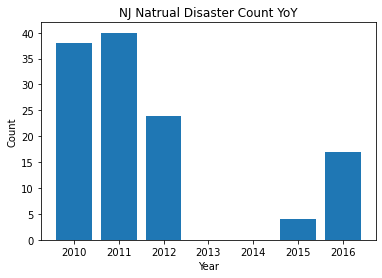

year start
2010    38
2011    40
2012    24
2015     4
2016    17
Name: State, dtype: int64

In [80]:

#goal here would be for the user to enter their own state and generate a graph of that states total natural disasters 

user_input = input("Please enter state abbreviation: ")
user_state = disaster_clean_df.loc[disaster_clean_df["State"] == user_input]

years = user_state.groupby("year start").count()
disaster_count_per_yr = years["State"]

plt.bar(years.index, disaster_count_per_yr)
#plt.rcParams["figure.figsize"] = (8, 20)


plt.title(f'{user_input} Natrual Disaster Count YoY')
plt.xlabel("Year")
plt.ylabel("Count")

plt.show()
disaster_count_per_yr

<AxesSubplot:ylabel='State'>

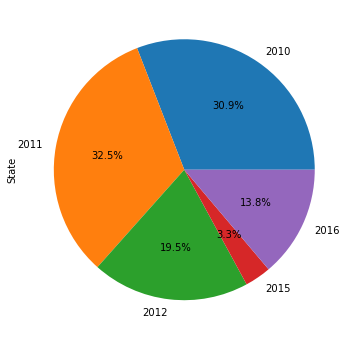

In [81]:
#pie plot of disasters per year 

disaster_count_per_yr.plot(kind = "pie", figsize = (12,6), autopct='%1.1f%%')

In [ ]:
#analysis on Disasters by type - all s
disaster_type_df =  disaster_clean_df.groupby("Disaster Type").count()
disaster_type_df.sort_values(by = "State", ascending = True)
disaster_type_df.head()

In [ ]:
#plot the disasters in a pie chart
disaster_total_by_type = disaster_type_df["State"]
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.6, 1, 1, 1)
disaster_total_by_type.plot(kind = "pie", figsize = (20,10), autopct='%1.1f%%', explode = explode)
disaster_total_by_type

## Statistical analysis 
### ANOVA test: Is there a statistical difference between the number of disasters different years ?
### Null Hypothesis: There is no difference between number of disasters in different years. 